AlexNet, which employed an 8-layer CNN, won the ImageNet Large Scale Visual Recognition Challenge 2012 by a large margin (Russakovsky et al., 2013). This network showed, for the first time, that the features obtained by learning can transcend manually-designed features, breaking the previous paradigm in computer vision.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [5]:
# Normalize the data
# Dividing by the maximum size
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
x_val = x_train[-2000:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:]
y_train = y_train[:-2000]

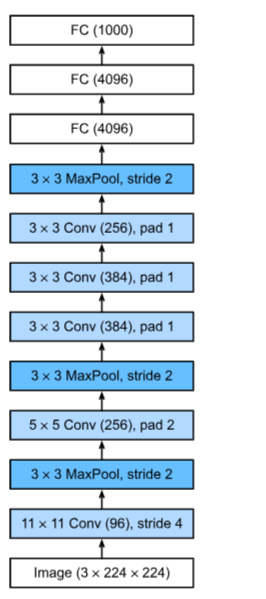

In [9]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=96,
                                 kernel_size=3,
                                 strides=1,
                                 padding='same',
                                 input_shape = (28,28,1)
                                 ))

model.add(tf.keras.layers.MaxPooling2D(pool_size=3,
                                strides=2))

model.add(tf.keras.layers.Conv2D(filters=256,
                                 kernel_size=5,
                                 padding='same',
                                 activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=3,
                                       strides=2))

model.add(tf.keras.layers.Conv2D(filters=384,
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))

model.add(tf.keras.layers.Conv2D(filters=384,
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))

model.add(tf.keras.layers.Conv2D(filters=256,
                                 kernel_size=3,
                                 padding='same',
                                 activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=3,
                                       strides=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(4096,
                                activation='relu'))

model.add(tf.keras.layers.Dense(4096,
                                activation='relu'))

model.add(tf.keras.layers.Dense(10,
                                activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 96)        960       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 96)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 384)         885120    
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 384)        

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train,
                    y_train,
                    batch_size=256,
                    epochs=10,
                    validation_data=(x_val, y_val))


Epoch 1/10
227/227 [==============================] - 29s 88ms/step - loss: 0.6494 - accuracy: 0.7516 - val_loss: 0.4119 - val_accuracy: 0.8460
Epoch 2/10
227/227 [==============================] - 15s 67ms/step - loss: 0.3132 - accuracy: 0.8855 - val_loss: 0.2963 - val_accuracy: 0.8915
Epoch 3/10
227/227 [==============================] - 15s 68ms/step - loss: 0.2609 - accuracy: 0.9032 - val_loss: 0.2528 - val_accuracy: 0.9070
Epoch 4/10
227/227 [==============================] - 15s 68ms/step - loss: 0.2274 - accuracy: 0.9153 - val_loss: 0.2297 - val_accuracy: 0.9135
Epoch 5/10
227/227 [==============================] - 15s 67ms/step - loss: 0.2051 - accuracy: 0.9249 - val_loss: 0.2412 - val_accuracy: 0.9120
Epoch 6/10
227/227 [==============================] - 15s 67ms/step - loss: 0.1866 - accuracy: 0.9301 - val_loss: 0.2364 - val_accuracy: 0.9135
Epoch 7/10
227/227 [==============================] - 15s 67ms/step - loss: 0.1705 - accuracy: 0.9357 - val_loss: 0.2468 - val_accuracy:

In [12]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9143999814987183
